# Pandas(Panel Datas)
Pandas는 주로 데이터 분석에 사용됩니다.  
대부분의 데이터는 시계열(series)이나 표(table)의 형태로 나타낼 수 있습니다.   
Pandas 패키지는 이러한 데이터를 다루기 위한 Series 클래스와 DataFrame 클래스를 제공합니다.   
숫자 테이블과 시계열 을 조작하기 위한 데이터 구조 와 연산을 제공합니다.  
  
- series : 열
- dataframe : table

## Series class
Series 클래스는 Numpy에서 제공하는 1차원 배열과 그 모양이 비슷합니다.  
하지만 Series class는 배열과 다르게 각 데이터의 의미를 표시하는 index(index)를 붙일 수 있습니다.  
데이터 자체는 값(value)라고 합니다.  

In [47]:
import pandas as pd
series = pd.Series(["하나", "둘", "셋", "넷", "다섯",
                   "여섯", "일곱", "여덟", "아홉", "열"],
                    index =[i for i in range(1, 11)])
series

1     하나
2      둘
3      셋
4      넷
5     다섯
6     여섯
7     일곱
8     여덟
9     아홉
10     열
dtype: object

object : 최상위에 있는 객체라고 생각하면 됩니다.

Series는 Value와 Index를 갖습니다.

### Series 생성하기
- iterable한.. : 한번에 하나씩 꺼내어 쓸 수 있는 객체   
  
Series 객체를 만들 때 첫 인수로 data, 두 번째 인수로는 index를 넣습니다. data 값으로  
iterable, 배열, scalar value, dict(key와 index를 동일하게 사용하거나 생략)를 사용할 수  
있습니다.  
index는 label이라고도 합니다. index는 data와 length가 동일해야 합니다. label은 꼭  
유일(unique)할 필요는 없습니다. 다만 반드시 hashable type만 사용 가능 합니다. 만약  
index를 생략할 경우 RangeIndex(0, 1, … , n)를 제공합니다.  
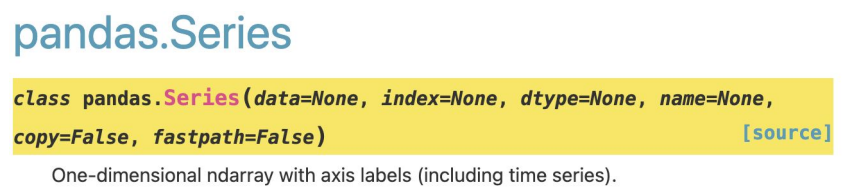  

In [48]:
s = pd.Series([9_904_312, 3_448_737, 2_890_451, 2_466_052],
             index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

index와 values로 각각 인덱스와 값에 접근할 수 있습니다.

In [49]:
s.index 

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [50]:
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

name 속성을 이용해서 이름을 붙일 수 있습니다.

In [3]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

data가 dict일 때 index가 최초에 dict의 key로 만들어집니다. 그 후 Series는 index  
키워드로 전달받은 인수로 index를재할당합니다. 그래서 밑에 예제와 같이 Series 객체의   
값이 NaN의 결과를 출력하는 것을 확인할 수 있습니다.  
  
index 지정 없이 dict 객체만 가지고 Series를 만들 수도 있습니다. 그 경우 dic의 key가 index로 
사용되는 됩니다.

In [4]:
d = {"a":1, "b":2, "c":3}
ser = pd.Series(data=d, index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [5]:
d = {"a":1, "b":2, "c":3}
ser = pd.Series(data=d, index=['x', 'y', 'z'])
ser

x   NaN
y   NaN
z   NaN
dtype: float64

NaN 값이 float 자료형에서만 표현 가능하므로 결과가 float 자료형이 된 것에 주목합시다.
이렇듯 어떤 오류로 인해 NaN값으로 바뀌게 되면 데이터형이 바뀐다... 생각해봅시다.

In [6]:
d = {"a":1, "b":2, "c":3}
ser = pd.Series(data=d)       # 인덱스 키워드 인자를 생략하면 그대로 만들어냅니다.
ser

a    1
b    2
c    3
dtype: int64

### Series index를 속성처럼 활용하기
만약 label 값이 영문 문자열인 경우에는 index label이 속성인것처럼 마침표(.)를 활용하여 해당 index 값에 접근할 수도 있습니다.  


In [7]:
ser.a, ser.b, ser.c

(1, 2, 3)

### Series의 특징
Series 객체는 index label을 키(key)로 사용하기에 딕셔너리 자료형과 비슷한 특징을  
갖습니다. 그래서 Series를 딕셔너리와 같은 방식으로 사용할 수 있게 구현해놨습니다.  
예를 들어 in 연산도 가능하고, items() 메서드를 사용해서 for문 루프를 돌려 각 요소의   
키(key)와 값(value)에 접근할 수도 있습니다.  

In [8]:
"서울" in s

True

In [16]:
9_904_312 in s # in 으로 물어볼 땐 키워드 인자로 물어본다.. values 값들을 확인하는 코드로 확인한 후 어떻게 물어야할지 감을 잡아보자

False

In [10]:
for k, v in s.items():
    print(f"{k}, {v}")

서울, 9904312
부산, 3448737
인천, 2890451
대구, 2466052


### Series 연산하기
넘파이 배열처럼 Series도 벡터화 연산을 할 수 있습니다. 다만 연산은 Series의   
value에만 적용되며 index 값은 변하지 않습니다.  
예를 들어 인구 숫자를 백만 단위로 만들기 위해 Series 객체를 1,000,000 으로  
나누어도 index label에는 영향을 미치지 않는 것을 볼 수 있습니다.  

In [17]:
s / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

### Series 인덱싱
Series는 넘파이 배열에서 가능한 index 방법 이외에도 index label을 이용한 인덱싱도 할 수 있습니다.  
배열 인덱싱이나 index label을 이용한 슬라이싱(slicing)도 가능합니다.  

In [51]:
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [52]:
s[1], s['부산']

(3448737, 3448737)

In [53]:
s[3], s['대구']

(2466052, 2466052)

배열 인덱싱을 하면 부분적인 값을 가지는 Series 자료형을 반환합니다.  
자료의 순서를 바꾸거나 특정한 자료만 취사 선택할 수 있습니다.  

In [54]:
s[[0, 3, 1]]

서울    9904312
대구    2466052
부산    3448737
dtype: int64

In [55]:
s[['서울', '대구', '부산']]

서울    9904312
대구    2466052
부산    3448737
dtype: int64

### Series 슬라이싱
배열 인덱싱을 하면 부분적인 값을 가지는 Series 자료형을 반환합니다.  
자료의 순서를 바꾸거나 특정한 자료만 취사 선택할 수 있습니다.  


In [59]:
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [56]:
s[1:3]

부산    3448737
인천    2890451
dtype: int64

In [58]:
s["서울":"대구"]

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

### Series index 기반 연산
두 Series에 대해 연산을 하는 경우 index가 같은 데이터에 대해서만 차이를 구합니다.  
대구와 대전의 경우에는 2010년 자료와 2015년 자료가 모두 존재하지 않기 때문에  
계산이 불가능하므로 NaN(Not a Number)이라는 값을 가지게 됩니다.  

In [60]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [61]:
s2 = pd.Series({"서울": 9631484, "부산": 3393191, "인천":2632035, "대전":1490158})
s2

서울    9631484
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [62]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272828.0
인천    258416.0
dtype: float64

### Series에서 값이 NaN인지 확인
Series 내 값이 NaN인지 아닌지 True / False 값을 구하려면 notnull() 메서드를 사용하면 됩니다.  

In [63]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

### Series에서 NaN이 아닌 값 구하기
notnull() 메서드로 구한 True / False 값을 활용하여 NaN인 값을 배제한 Series 객체를 만들 수 있습니다.  

In [64]:
ds[ds.notnull()]

부산     55546.0
서울    272828.0
인천    258416.0
dtype: float64

### Series 데이터 추가, 갱신, 삭제
딕셔너리 때와 비슷하게 인덱싱을 경우에 맞춰 사용하면 데이터를 추가(add)하거나 갱신(update)할 수 있습니다.  
기존에 있는 index에 값을 할당하면 갱신됩니다.  

In [18]:
rs = pd.Series([1.63323, 2.832690, 9.8181077],
             index=["부산", "서울", "인천"])

In [19]:
rs["부산"] = 1.63
rs

부산    1.630000
서울    2.832690
인천    9.818108
dtype: float64

없는 index에 값을 할당하면 Series에 데이터가 추가(add)됩니다. 아래 예제에서는  
“대구"라는 index는 현재 없는데 그 index에 값을 1.41 할당하여 데이터를 추가하고 있습니다.  

In [20]:
rs["대구"] = 1.41
rs

부산    1.630000
서울    2.832690
인천    9.818108
대구    1.410000
dtype: float64

데이터를 삭제할 때도 딕셔너리처럼 del 명령을 사용합니다. 아래 예제에서는 "서울"  
이라는 index에 접근하여 del 명령을 사용하여 데이터를 삭제하고 있습니다.  

In [21]:
del rs["서울"]
rs

부산    1.630000
인천    9.818108
대구    1.410000
dtype: float64

#### 연습 문제
아래 fin1과 fin2_value, fin2_index를 활용하여 Series 객체 ser_finance1, ser_finance2를 만들어보세요.   


In [22]:
fin1 = {"카카오":60010, "삼성전자":61000, "LG전자":90000}
fin2_value = [60200, 61200, 200100]
fin2_index = ["카카오", "삼성전자", "네이버"]

In [24]:
ser_finance1 = pd.Series(data=fin1)
ser_finance2 = pd.Series(data=fin2_value, index=fin2_index)
print(ser_finance1)
print(ser_finance2)

카카오     60010
삼성전자    61000
LG전자    90000
dtype: int64
카카오      60200
삼성전자     61200
네이버     200100
dtype: int64


#### 연습 문제
앞서 만든 두 Series 객체를 활용하여 사칙 연산을 각각 수행해보세요. 사칙연산 중 NaN 값을 갖는 항목과 dtype을 각각 확인해보세요. 왜 해당 dtype이 나오는지 설명하세요.  

In [25]:
ser_finance1 - ser_finance2 # NaN 값으로 인해 float형

LG전자      NaN
네이버       NaN
삼성전자   -200.0
카카오    -190.0
dtype: float64

In [26]:
ser_finance1 + ser_finance2 # 위와 동일

LG전자         NaN
네이버          NaN
삼성전자    122200.0
카카오     120210.0
dtype: float64

In [27]:
ser_finance1 * ser_finance2 # 위와 동일

LG전자             NaN
네이버              NaN
삼성전자    3.733200e+09
카카오     3.612602e+09
dtype: float64

In [28]:
ser_finance1 / ser_finance2 # 다른 결과값도 float형

LG전자         NaN
네이버          NaN
삼성전자    0.996732
카카오     0.996844
dtype: float64

#### 연습 문제
아래의 연산 결과 중 NaN 값이 없게 Series 객체를 출력해보세요.

In [30]:
result = ser_finance1 - ser_finance2
result[result.notnull()]

삼성전자   -200.0
카카오    -190.0
dtype: float64

## DataFrame class
DataFrame은 Pandas의 주요 데이터 구조입니다. label된 row와 column, 두 개의 축을 갖는 데이터 구조입니다.  
산술 연산은 row와 column 모두 적용됩니다. Series 객체를 갖는 dictionary라고 생각하면 비슷합니다.   
첫 인자로 data, 두 번째 인자로 index를 전달합니다.  
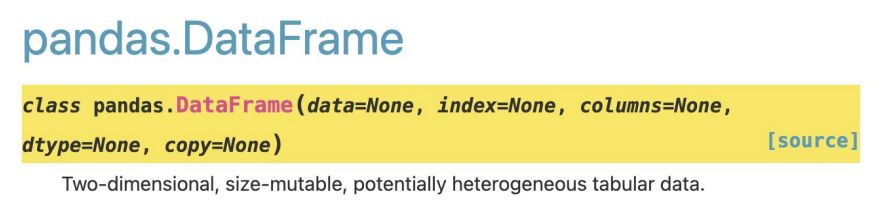  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame

### DataFrame 생성
Series가 1차원 벡터 데이터에 행방향 index(row index)를 붙인 것이라면  
DataFrame 클래스는 2차원 행렬 데이터에 index를 붙인 것과 형태가 비슷합니다.  
row와 column을 갖는 2차원이므로 각각의 행 데이터의 이름이 되는  
행 index(row index) 뿐 아니라 각각의 열 데이터의 이름이 되는 열 index(column index)도 붙일 수 있습니다.  
DataFrame을 만드는 방법은 다양합니다. 가장 간단한 방법은 다음과 같습니다.  
1. 우선 하나의 열이 되는 데이터를 리스트나 일차원 배열을 준비합니다.
2. 이 각각의 열에 대한 이름(label)을 키로 가지는 딕셔너리를 만듭니다.
3. 이 데이터를 DataFrame 클래스 생성자에 넣는다. 동시에 열방향 index는 columns 인수로, 행방향 index는 index 인수로 지정합니다.  

In [34]:
d = {'col1': [1,2], 'col2':[3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [143]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [144]:
df.dtypes

지역                object
2015               int64
2010               int64
2005               int64
2000               int64
2010-2015 증가율    float64
dtype: object

### DataFrame의 속성 values, columns, index
Series와 마찬가지로 데이터만 접근하려면 values 속성을 사용합니다. 열방향 index와 행방향 index는 각각 columns, index 속성으로 접근합니다.  

In [145]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [146]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [147]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

### DataFrame 이름 붙이기
Series에서 처럼 열방향 index와 행방향 index에 이름을 붙이는 것도 가능합니다.  

In [148]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


#### 연습 문제
지금부터 인터넷 서핑을 통해 자신이 관심있는 데이터를 얻고, 아래 조건을 만족하는 
DataFrame을 직접 만들어보세요.

In [48]:
data = {
    "1월": [1, 21, 22, 23, 24],
    "3월": [1,None,None,None,None],
    "5월": [5, 27,None,None,None],
    "6월": [6,None,None,None,None]}
index = [i for i in range(1,6)]
holiday = pd.DataFrame(data, index=index)
holiday.name = "데이터엔지니어링20기_연휴"
holiday.columns.name = "월"
holiday.index.name = "연휴날 수"
holiday

월,1월,3월,5월,6월
연휴날 수,,,,
1,1,1.0,5.0,6.0
2,21,NaN,27.0,NaN
3,22,NaN,NaN,NaN
4,23,NaN,NaN,NaN
5,24,NaN,NaN,NaN


### DataFrame 전치(Transpose)
DataFrame은 전치(transpose)를 포함하여 넘파이 2차원 배열이 가지는 대부분의 속성이나 메서드를 지원합니다.  


In [149]:
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [150]:
df.T

도시,서울,부산,인천,대구
특성,,,,
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


### DataFrame column 추가, 갱신, 삭제
DataFrame은 column을 Series의 딕셔너리으로 볼 수 있다고 했습니다. 즉 Column 단위로 데이터를 갱신하거나 추가, 삭제할 수 있습니다.

In [151]:
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [152]:
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)  # round(2) 2째 자리까지 표기되도록 반올림
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [153]:
del df["2010-2015 증가율"] 
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


### DataFrame column 인덱싱
DataFrame은 column label을 키로, column Series를 값으로 가지는 딕셔너리와 비슷하다고 하였습니다.  
따라서 DataFrame을 인덱싱을 할 때도 column label을 키(key)로 생각하여 인덱싱을 할 수 있습니다.  
index로 label 값을 하나만 넣으면 Series 객체가 반환됩니다.  

In [51]:
df["지역"]

서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [154]:
df["2010"]

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [155]:
type(df["2010"])

pandas.core.series.Series

label의 배열 또는 리스트로 인덱싱하면 DataFrame 타입이 반환됩니다.

In [156]:
df[["2010", "2015"]]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


만약 하나의 column만 빼내어더라도 DataFrame 자료형을 유지하고 싶다면 요소가 하나인 리스트 자료형을 사용해서 인덱싱하면 됩니다. 

In [157]:
df[["2010"]]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


- DataFrame의 column index가 문자열 label일 때는 순서를 나타내는 정수 index를 column 인덱싱에 사용할 수 없습니다.   column index가 문자열인데 정수 index를 넣으면 KeyError 오류가 발생합니다.  
- 원래부터 문자열이 아닌 정수형 column index를 가지는 경우에는 index 값으로 정수를 사용할 수 있습니다.  
- 별도의 columns 키워드 인수를 전달하지 않으면 RangeIndex를 기본 값으로 부여합니다.

In [168]:
df2 = pd.DataFrame(np.arange(12).reshape(3, 4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [169]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int32

In [170]:
df2[[1, 2]]

,1,2
0,1,2
1,5,6
2,9,10


### DataFrame row 슬라이싱
만약 row 단위로 인덱싱을 하고자 하면 항상 슬라이싱(slicing)을 해야 합니다. index의 값이 문자 label이면 label 슬라이싱도 가능합니다.  

In [171]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [172]:
df[:1]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [173]:
df[:"서울"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [55]:
df["부산":"부산"]

,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
부산,경상권,3448737,3393191,3512547,3655437,0.0163,-3.4


### DataFrame row 인덱싱할 경우
KeyError가 발생합니다.

In [174]:
df["서울"]

KeyError: '서울'

### DataFrame 개별 데이터 인덱싱
DataFrame에서 column label로 인덱싱하면 Series가 됩니다. 이 Series를 다시 row label로 인덱싱하면 개별 데이터가 나옵니다.

In [176]:
df["2015"]["서울"]

9904312

In [177]:
type(df["2015"]["서울"])

numpy.int64

#### DataFrame 개별 데이터 인덱싱, 역순으로
앞서 공부했듯 DataFrame에서 row label로 인덱싱하면 KeyError가 발생됩니다. 그래도 굳이 row 단위로 먼저 시도하려면 슬라이싱해야 합니다.  
그 때 반환 타입은 DataFrame이 됩니다. 이 DataFrame을 다시 column label로 인덱싱하면 개별 데이터가 아닌 Series 객체가 나옵니다. 즉 역순으로 하는 것은 썩 효율적이지 않음을 알 수 있습니다.

In [178]:
df["서울":"서울"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [179]:
df["서울":"서울"]["2015"]

도시
서울    9904312
Name: 2015, dtype: int64

In [180]:
 type(df["서울":"서울"]["2015"])

pandas.core.series.Series

### DataFrame 인덱싱과 슬라이싱 정리
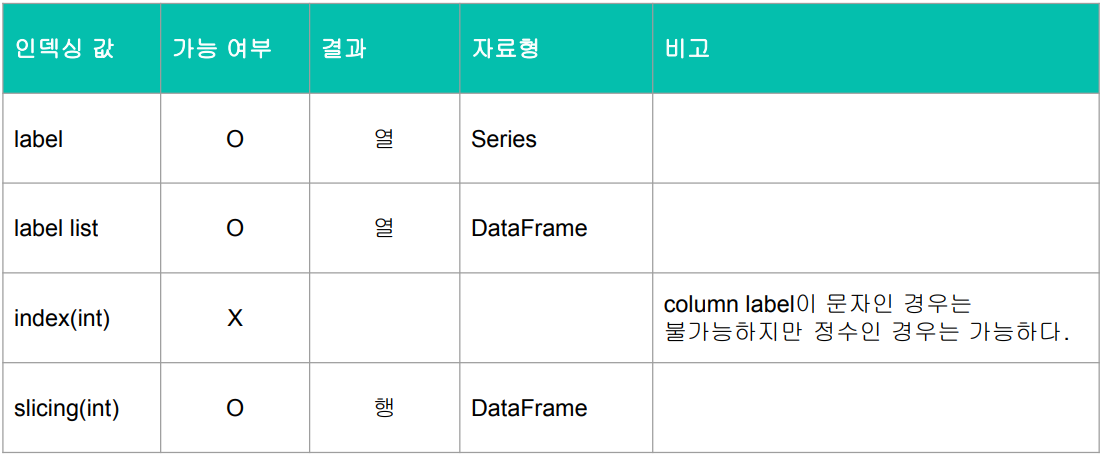

#### 연습 문제
다음 DataFrame을 활용하여 아래 문제를 해결해보세요.
1. 모든 학생의 수학 점수를 Series로 나타낸다.
2. 모든 학생의 국어와 영어 점수를 데이터 프레임으로 나타낸다.
3. 모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.
4. 방자의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산한다.
5. 춘향의 점수를 DataFrame으로 나타낸다.
6. 향단의 점수를 Series로 나타낸다.

In [71]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

In [72]:
df

,국어,영어,수학
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,40,70


In [73]:
math_scores = pd.Series(data["수학"], index)
print(math_scores)
print(df.loc[:,'국어':'영어'])
df["국어 평균"] = sum(df["국어"]) / 4
df["영어 평균"] = sum(df["영어"]) / 4
print(df)
df.loc["향단","영어"] = 80
df["영어 평균"] = sum(df["영어"]) / 4
print(df)
hyang_scores = pd.Series(df.loc["향단"])
print(hyang_scores)

춘향    90
몽룡    60
향단    80
방자    70
dtype: int64
    국어  영어
춘향  80  90
몽룡  90  70
향단  70  60
방자  30  40
    국어  영어  수학  국어 평균  영어 평균
춘향  80  90  90   67.5   65.0
몽룡  90  70  60   67.5   65.0
향단  70  60  80   67.5   65.0
방자  30  40  70   67.5   65.0
    국어  영어  수학  국어 평균  영어 평균
춘향  80  90  90   67.5   70.0
몽룡  90  70  60   67.5   70.0
향단  70  80  80   67.5   70.0
방자  30  40  70   67.5   70.0
국어       70.0
영어       80.0
수학       80.0
국어 평균    67.5
영어 평균    70.0
Name: 향단, dtype: float64


In [74]:
df["평균"] = round((df["국어"]+df["영어"]+df["수학"])/3, 2)
df

,국어,영어,수학,국어 평균,영어 평균,평균
춘향,80,90,90,67.5,70.0,86.67
몽룡,90,70,60,67.5,70.0,73.33
향단,70,80,80,67.5,70.0,76.67
방자,30,40,70,67.5,70.0,46.67


In [75]:
# (1) 모든 학생의 수학 점수를 Series로 나타낸다.
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [76]:
# (2) 모든 학생의 국어와 영어 점수를 DataFrame으로 나타낸다.
df[['국어', '영어']]

,국어,영어
춘향,80,90
몽룡,90,70
향단,70,80
방자,30,40


In [77]:
# (3) 모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.
df['평균'] = round((df['국어'] + df['영어'] + df['수학']) / 3, 2)
# round(df.mean(axis=1), 2)을 활용해도 된다.
df

,국어,영어,수학,국어 평균,영어 평균,평균
춘향,80,90,90,67.5,70.0,86.67
몽룡,90,70,60,67.5,70.0,73.33
향단,70,80,80,67.5,70.0,76.67
방자,30,40,70,67.5,70.0,46.67


In [78]:
# (4) 방자의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산한다.
df['영어']['방자'] = 80
# df.loc['방자', '영어'] = 80
df['평균'] = round((df['국어'] + df['영어'] + df['수학']) / 3, 2)
# round(df.mean(axis=1), 2)을 활용해도 된다.
df

C:\Users\PlayData\AppData\Local\Temp\ipykernel_11336\3282087422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['영어']['방자'] = 80


,국어,영어,수학,국어 평균,영어 평균,평균
춘향,80,90,90,67.5,70.0,86.67
몽룡,90,70,60,67.5,70.0,73.33
향단,70,80,80,67.5,70.0,76.67
방자,30,80,70,67.5,70.0,60.00


In [79]:
# (5) 춘향의 점수를 DataFrame으로 나타낸다.
df[:1]
# df["춘향":"춘향"]

,국어,영어,수학,국어 평균,영어 평균,평균
춘향,80,90,90,67.5,70.0,86.67


In [80]:
# (6) 향단의 점수를 Series로 나타낸다.
df.T["향단"]

국어       70.00
영어       80.00
수학       80.00
국어 평균    67.50
영어 평균    70.00
평균       76.67
Name: 향단, dtype: float64

#### 연습 문제
다음 DataFrame을 만들어보세요.
- 랜덤 시드는 0입니다.
- values는 넘파이 서브 패키지 중 random의 randn() 메서드를 사용하세요.
- pd.date_range(“20130206”, periods=날짜수)을 활용하세요.
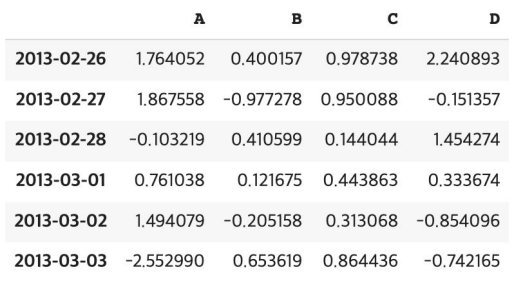  

In [111]:
import numpy as np

np.random.seed(0)
values = np.random.randn(6, 4)
columns = ['A', 'B', 'C', 'D']
df = pd.DataFrame(data=values, index=pd.date_range("20130206", periods=6), columns=columns) # columns=list("ABCD")

In [112]:
df

,A,B,C,D
2013-02-06,1.764052,0.400157,0.978738,2.240893
2013-02-07,1.867558,-0.977278,0.950088,-0.151357
2013-02-08,-0.103219,0.410599,0.144044,1.454274
2013-02-09,0.761038,0.121675,0.443863,0.333674
2013-02-10,1.494079,-0.205158,0.313068,-0.854096
2013-02-11,-2.552990,0.653619,0.864436,-0.742165


In [81]:
# 다른 풀이
np.random.seed(0)
dates = pd.date_range("2013-02-26", periods=6)
print(dates)
df3 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df3

DatetimeIndex(['2013-02-26', '2013-02-27', '2013-02-28', '2013-03-01',
               '2013-03-02', '2013-03-03'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-02-26,1.764052,0.400157,0.978738,2.240893
2013-02-27,1.867558,-0.977278,0.950088,-0.151357
2013-02-28,-0.103219,0.410599,0.144044,1.454274
2013-03-01,0.761038,0.121675,0.443863,0.333674
2013-03-02,1.494079,-0.205158,0.313068,-0.854096
2013-03-03,-2.552990,0.653619,0.864436,-0.742165


#### 연습 문제
팀(Team) 객체를 생성할 수 있는 클래스를 만들어보세요.  
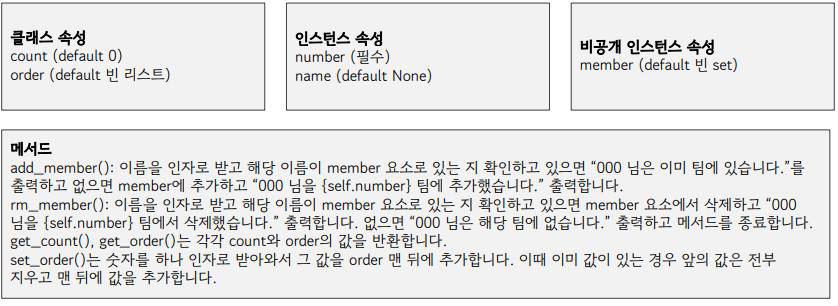

In [14]:
class Team:
    count = 0
    order = []
    def __init__(self, number):
        self.number = number
        self.__member = set()
        .count += 1
    def add_member(self, name):
        self.name = name
        if self.name in self.__member:
            return print(f"{self.name}님은 이미 팀에 있습니다.")
        else:
            print(f"{self.name}님을 팀에 추가했습니다.")
            self.__member.add(self.name)
    def rm_member(self, name):
        if self.name in self.__member:
            self.__member.remove(self.name)
            print(f"{self.name}님을 {self.number} 팀에서 삭제했습니다.")
        else:
            return print(f"{self.name}님은 해당 팀에 없습니다.")
    def get_count(self):
        return self.count
    def get_order(self):
        return self.order
    def set_order(self, number2):
            if number2 in self.order:
                    self.order = []
                    self.order.append(number2)
            else:
                self.order.append(number2) 
    def __len__(self):
        return len(self.member)

In [ ]:
def __len__(self):
    return len(slef.member) # 하면
len(t1) # --> 파이썬 내부에서 __len__(self)  를 찾습니다.

In [16]:
t1 = Team(1)

In [17]:
t1.add_member("윤규헌")

윤규헌님을 팀에 추가했습니다.


In [18]:
t1.add_member("윤규헌")

윤규헌님은 이미 팀에 있습니다.


In [19]:
t1.add_member("이호진")

이호진님을 팀에 추가했습니다.


In [20]:
t1.add_member("이기수")

이기수님을 팀에 추가했습니다.


In [21]:
t1.rm_member("이기수")

이기수님을 1 팀에서 삭제했습니다.


In [22]:
t1.rm_member("이기수")

이기수님은 해당 팀에 없습니다.


In [23]:
t2=Team(2)

In [24]:
t2.set_order(t2.number)

In [25]:
t2.set_order(t1.number)

In [26]:
t1.get_order()

[2, 1]

In [27]:
t1.get_count()

1

t1 = Team() # Team 클래스로부터 인스턴스를 초기화한다. 초기화할 때 넣는 인자 값은 __init__(self, 여기로 전달됨)  
초기화될 때 1번이자 최초로 실행되는게 __init__(self) 이 특별 메서드이다.

In [82]:
# 다른 풀이
class Team:
    '''팀 객체를 만듭니다.'''
    count = 0
    order = []
    def __init__(self,number):
        self.number = number
        self.name = None
        self.__member = set()
        print(self.__dict__)
        self.count = self.count + 1
        print(self.__dict__)
    # 내장 함수(Built-in function) len(Team()) --> 파이썬이 __len__(self)를 찾아서 실행    
    def __len__(self):
        return len(self.__member)
    def add_member(self,name):
        if name in self.__member:
            print(f"{name}님은 이미 팀에 있습니다.")
        else:
            self.__member.add(name)
            print(f"{name}님을 {self.number}팀에 추가했습니다.")
    def rm_member(self,name):
        if name in self.__member:
            self.__member.remove(name)
            print(f"{name}님을 {self.number}팀에서 삭제했습니다.")
        else:
            print(f"{name}님은 해당 팀에 없습니다.")
    def get_count(self):
        print(f"count: {Team.count}")
    def get_order(self):
        print(f"order: {Team.order}")
    def set_order(self,num):
        if num in Team.order:
            Team.order.remove(num)
        Team.order.append(num)
t1 = Team(1)
t1.add_member('윤규헌')
t1.add_member('윤규헌')
print(len(t1))
t1.add_member('이호진')
print(len(t1))
t1.add_member("이기수")
t1.rm_member('이기수')
t1.rm_member('이기수')
t2 = Team(2)
t2.set_order(t2.number)
t1.set_order(t1.number)
t1.get_order()
t1.get_count()
t3 = Team(3)
t3.get_count()
t3.set_order(t3.number)
t3.get_order()

{'number': 1, 'name': None, '_Team__member': set()}
{'number': 1, 'name': None, '_Team__member': set(), 'count': 1}
윤규헌님을 1팀에 추가했습니다.
윤규헌님은 이미 팀에 있습니다.
1
이호진님을 1팀에 추가했습니다.
2
이기수님을 1팀에 추가했습니다.
이기수님을 1팀에서 삭제했습니다.
이기수님은 해당 팀에 없습니다.
{'number': 2, 'name': None, '_Team__member': set()}
{'number': 2, 'name': None, '_Team__member': set(), 'count': 1}
order: [2, 1]
count: 0
{'number': 3, 'name': None, '_Team__member': set()}
{'number': 3, 'name': None, '_Team__member': set(), 'count': 1}
count: 0
order: [2, 1, 3]


In [ ]:
# 다른 풀이 2
class Team:
    """팀 객체를 만듭니다."""
    # 클래스 속성
    count = 0 # Team 클래스로부터 초기화된 인스턴스 개수
    order = []
    def __init__(self, number, name=None, member=set()):
        self.number = number
        self.name = name
        self.__member = member
        Team.count += 1
    def add_member(self, name):
        # 해당 이름이 팀에 있을 경우
        if name in self.__member:
            print(f"{name} 님은 이미 팀에 있습니다.")
            return
        # 해당 이름이 팀에 없을 경우
        else:
            self.__member.add(name)
            print(f"{name} 님을 {self.number} 팀에 추가했습니다.")
    def rm_member(self, name):
        # 해당 이름이 팀에 있을 경우
        if name in self.__member:
            self.__member.discard(name)
            print(f"{name} 님을 {self.number} 팀에서 삭제했습니다.")
        # 해당 이름이 팀에 없을 경우
        else:
            print(f"{name} 님은 해당 팀에 없습니다.")
    def get_count(self):
        return self.count
    def get_order(self):
        return self.order
    def set_order(self, number):
        if number in self.order:
            self.order.remove(number)
        self.order.append(number)
    # 내장 함수(Built-in function) len(Team()) --> 파이썬이 __len__(self)를 찾아서 실행
    def __len__(self):
        return len(self.__member)

## Pandas 데이터 입출력
Pandas는 데이터 파일을 읽어 DataFrame을 만들 수 있습니다.  
가장 단순하지만 널리 사용되는 CSV(Comman Separated Value) 포맷 입출력에
대해 우선 살펴보겠습니다.  
CSV 파일 포맷은 데이터 값이 콤마(comma)로 구분되는 텍스트 파일입니다.  

### Pandas 데이터 CSV로 출력하기
데이터 출력하기에 앞서 우선 다음과 같은 DataFrame을 만들어 봅시다.   
데이터를 csv 파일로 출력할 땐 to_csv() 메서드를 활용합니다. 첫 인자로는 파일 경로를 입력합니다. 현재 만든DataFrame의 index는 의미 없는 값이므로 출력할 때 배제하겠습니다.  
to_csv()의 기본값 인자인 index의 default가 True이니 index=False 키워드를 활용하여 설정해줘야 합니다.  
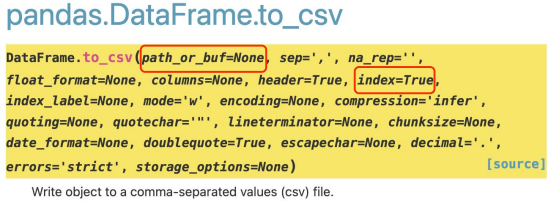  

In [8]:
import pandas as pd

df = pd.DataFrame({"c1":[1, 2, "누락"],
                 "c2":[1.11, None, 3.33],
                 "c3":["one", "two", "three"]})
df

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


df_csv.to_csv(“파일이름 및 확장자", index=False)와 같이 사용합니다.  
이 셀을 시작하고 우리가 notebook_dir로 설정한 C:\python 경로에 해당 파일이 생성되었는지 확인해보세요.

In [9]:
df.to_csv("sample1-19.csv", index=False)

파일을 확인했을 때 아래와 같은 내용으로 생성되었나요?  
엑셀과 같은 형태로 보이기도, 아래 텍스트처럼 보이는 사람도 있을 것입니다.  
둘 다 같은 파일입니다.  
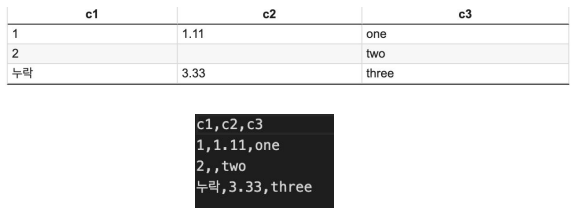

### Pandas csv로부터 데이터 입력하기
이번에는 만든 csv 파일로부터 데이터를 불러오는 작업을 진행하려 합니다. 이때는 
read_csv() 메서드를 사용할 겁니다.  
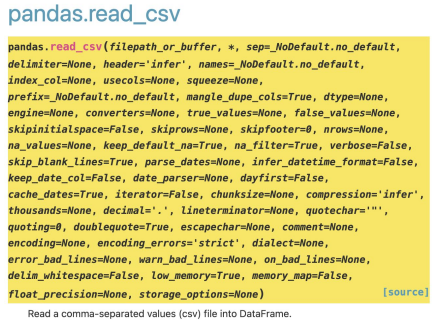  

CSV 파일로부터 데이터를 읽어 DataFrame을 만들 때는 pandas.read_csv 함수를 
사용합니다. 함수의 첫 번째 인수로 “파일 이름.확장자” 문자열로 넣습니다. 그럼 아래와 
같이 DataFrame을 잘 불러오는 것을 확인할 수 있습니다.

읽어온 데이터에 column 인덱스 값만 있어

읽은 데이터에는 column 인덱스는 있지만 row 인덱스 정보가 없으므로 0부터 시작하는 
정수 인덱스가 자동으로 추가된 것을 확인할 수 있습니다.

In [11]:
df_read = pd.read_csv("sample1-19.csv")
df_read

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


### Pandas 데이터 csv로 출력하기
이번에는 column 인덱스를 배제하고 저장해보겠습니다. 아래의 예제 코드와 같이 
header=False 키워드 인수를 추가해주면 됩니다. 파일명을 “sample2.csv”로 지정하고 
바로 실행해볼까요?  
저장된 파일을 열어 우리가 의도한 대로 column 인덱스가 없는 상태인지 확인해보세요.

In [12]:
df.to_csv("sample1-19-2.csv", index=False, header=False)
# 0부터 시작하는 정수 인덱스가 자동으로 추가된 것을 확인할 수 있습니다.

### Pandas csv로부터 데이터 입력하기
이제 이 파일을 다시 불러오도록 하겠습니다. column 인덱스 정보가 없는 경우에는 
read_csv()의 names 키워드 인수를 활용해서 설정할 수 있습니다. 아래 예제 코드를 
살펴보고 데이터를 불러올 때 names 키워드를 통하여 column 인덱스 정보를 직접 
추가해보도록 합시다.

In [14]:
pd.read_csv('sample1-19-2.csv')

,1,1.11,one
0,2,NaN,two
1,누락,3.33,three


In [13]:
pd.read_csv('sample1-19-2.csv', names=['c1', 'c2', 'c3'])

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


### Pandas 데이터 csv로 출력하기
이번에는 콤마로 구분되지 않은 텍스트 파일에 대해서 처리해 보도록 하겠습니다. 
주피터 랩에서 매직 명령어인 ‘%%writefile 파일명’을 사용하여 파일을 저장할 수 
있습니다. 아래의 코드를 작성하여 파일을 저장해봅시다.

In [15]:
%%writefile sample1-19-3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Writing sample1-19-3.txt


### Pandas csv로부터 데이터 입력하기
이제 앞에서 만든 텍스트 파일을 불러오려면, 데이터를 구분하는 구분자(separator)가 
콤마(comma)가 아니면 sep 인수를 써서 구분자를 사용자가 지정해줘야 합니다. 만약 
길이가 정해지지 않은 공백이 구분자인 경우에는 ‘\s+’ 정규식(regular expression) 
문자열을 사용하면 됩니다.

In [16]:
pd.read_table('sample1-19-3.txt', sep='\s+')

,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


### Pandas 데이터 csv로 출력하기
이번에는 파일 안 내용을 살펴봤을 때 데이터뿐만 아니라 상단에 부가적인 텍스트가 
있는 경우를 살펴보려 합니다. 아래의 코드를 작성하여 파일을 저장해보세요. 

In [17]:
%%writefile sample1-19-4.txt
파일 제목: sample1-19-4.txt
데이터 포맷의 설명:
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing sample1-19-4.txt


### Pandas csv로부터 데이터 입력하기
데이터로 불러올 자료 파일 중에 건너 뛰어야 할 상단 행이 있으면 skiprows 인수를 
사용하면 됩니다. 건너 뛸 줄을 리스트 안에 작성하면 됩니다. 리스트가 아닌 range(2)를 
활용할 수도 있습니다.

In [19]:
pd.read_csv('sample1-19-4.txt', skiprows=[0, 1])  # skiprows=[0, 1] -> 0과 1줄 

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


### Pandas csv로부터 데이터 입력하기
데이터로 불러올 자료 안 특정한 값을 NaN으로 취급하고 싶으면 na_values 인수에 
NaN 값으로 취급할 값을 넣습니다.

(sample1-19.csv의 데이터)
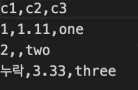  

In [84]:
df_na_val = pd.read_csv('sample1-19.csv', na_values=['누락'])
df_na_val

,c1,c2,c3
0,1.0,1.11,one
1,2.0,NaN,two
2,NaN,3.33,three


# 파일을 읽을 때와 마찬가지로 파일을 출력할 때도 sep 인수로 구분자를 바꿀 수 있습니다.  
(sample1-19-5.txt의 데이터)
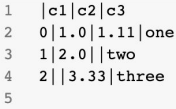  

In [85]:
df_na_val.to_csv('sample1-19-5.txt', sep='|')

또 불러올 때와 마찬가지로 저장할 때도 na_rep 키워드 인수를 사용해서 NaN 표시값을 
바꿀 수도 있습니다. 아래의 코드를 보면 NaN 값을 ‘누락'으로 변경해서 저장합니다.  
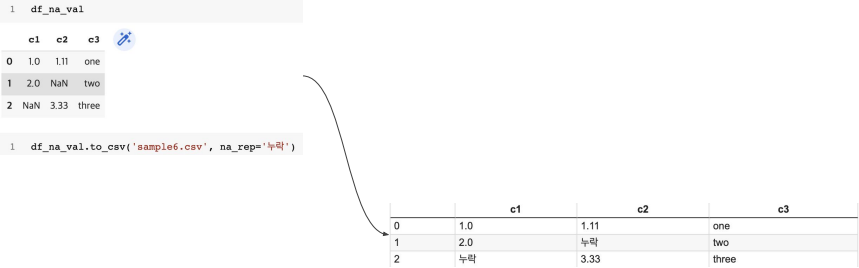

In [ ]:
df_na_val.to_csv('sample1-19-6.csv', na_rep='누락')

## 온라인의 csv 파일 가져오기
웹상에는 다양한 데이터 파일이 CSV 파일 형태로 제공됩니다. read_csv 명령 사용시 
path 대신 URL을 지정하면 Pandas가 직접 해당 파일을 다운로드하여 읽어들입니다. 
다음은 웹사이트에 저장되어 있는 데이터 파일을 원격으로 읽는 명령 예제입니다.

In [25]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


만약 앞이나 뒤의 특정 개수만 보고 싶다면 head() 메서드나 tail() 메서드를 사용하면 
됩니다. 메서드 인수로 출력할 행의 수를 넣으면 됩니다.

## DataFrame 고급 인덱싱

DataFrame에서 특정한 데이터만 골라내는 것을 인덱싱(indexing)이라고 합니다. 앞 
절에서는 column에 대해 label, label list 인덱싱을, row에 대해 index(정수) 슬라이스 
총 3가지 방식을 사용하여 데이터를 추출하는 방법을 살펴봤습니다.  
그런데 Pandas는 NumPy 배열과 같이 콤마(,)를 사용한 (row 인덱스, column 인덱스) 
형식의 2차원 인덱싱을 지원하기 위해 다음과 같은 특별한 인덱서(indexer) 속성도 
제공합니다.  
- loc : label 값 기반의 2차원 인덱싱
- iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱

### DataFrame 고급 인덱싱 - loc 인덱서
loc 인덱서는 다음처럼 사용할 수 있습니다.
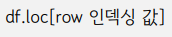  
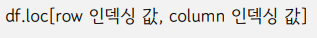  
  
이 때 인덱싱 값은 다음 중 하나입니다. row 인덱싱 값은 정수 또는 row index 
데이터이고 column 인덱싱 값은 label 문자열입니다.
- index 데이터
- index 데이터 슬라이스
- index 데이터 리스트
- 같은 row 인덱스를 가지는 boolean Series       (row 인덱싱의 경우)
- 또는 위의 값들을 반환하는 함수

향단이 문제 시리즈로 뽑아오는거 내가 푼 방법이 아닌 것 공부하기

loc 인덱싱 할 때 인덱스로도 되고 슬라이싱으로도 되는걸 기억하자. row와 column 자리 모두.

loc 인덱서  
column 인덱싱 값은 라벨 문자열 or 숫자

우선 다음과 같은 DataFrame을 만들어 보세요.
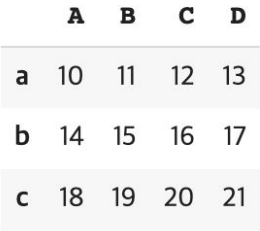  

In [31]:
import numpy as np

df = pd.DataFrame(np.arange(10, 22).reshape(3, 4), ["a", "b", "c"], ["A", "B", "C", "D"]) # list('abc')와 list('ABCD') 이용해서 할 수 있다.
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


만약 loc 인덱서를 사용하면서 인덱스를 콤마 없이 하나만 넣으면 row을 선택합니다.  
  
인덱스 데이터가 “a”인 행을 고르면 해당하는 row가 Series로 반환됩니다. Series라서 
상하로 길게 표현되기는 했지만 row를 가져오고 있습니다.  

In [32]:
df.loc["a"]

A    10
B    11
C    12
D    13
Name: a, dtype: int32

인덱스 데이터의 슬라이스도 가능합니다. 이 때는 사실 loc를 쓰지 않을 때와 결과가 
같습니다.

In [33]:
df.loc["b":"c"]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [34]:
df["b":"c"]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


인덱스 데이터의 리스트 자료형도 사용 가능합니다. 이 때는 loc를 쓰지 않으면 KeyError 
오류가 발생합니다.


In [35]:
df.loc[["b", "c"]]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [36]:
df[["b", "c"]]

KeyError: "None of [Index(['b', 'c'], dtype='object')] are in the [columns]"

notnull() 으로 불리언 타입을 반환해 이걸 불리언 시리즈로 로우를 기준으로 인덱싱 할 수 있다. 또는

Boolean Series로 row를 기준으로 인덱싱할 수 있습니다.아래 예제에서는 df.A(영어 
문자열은 속성처럼 접근 가능)의 값 중 15 초과인 결과를 Boolean Series 값을 얻을 수 
있습니다. 이 Boolean Series를 활용해 인덱싱하고 있습니다. 이는 데이터베이스와 같이 
인덱스를 가지는 Boolean Series도 row를 선택하는 인덱싱 값으로 쓸 수 있습니다.

In [37]:
df.A > 15  # 컬럼만 된다.

a    False
b    False
c     True
Name: A, dtype: bool

In [38]:
df.loc[df.A > 15]

,A,B,C,D
c,18,19,20,21


callable한 함수를 만들어서 인덱싱하는데 사용할 수 있습니다. 다음 함수는 A열의 값이 
10보다 큰 row만 선택합니다.

# 여기부터

In [39]:
def select_rows(df, num):
    return df.A > num

In [40]:
select_rows(df, 10)

a    False
b     True
c     True
Name: A, dtype: bool

In [41]:
df.loc[select_rows(df, 10)]  # 중요한 건 인덱서 안에서 함수를 호출할 수가 있다는 점..!

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


loc 인덱서 는 column label 인덱싱이나 column label 리스트 인덱싱은 불가능합니다.

loc 인덱서 에서 생략되거나 정수로 인덱스를 넣어줘도 문자열로 받아들인다. 라벨 인덱싱을 한다고 했던 것을 생각해보자. 때문에 숫자로 하더라도 끝 값을 포함한다.

### Series 데이터 개수 세기


### DataFrame 데이터 개수 세기


In [2]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [45]:
2**64

18446744073709551616

### Series 카테고리 값 세기

In [65]:
np.random.seed(1)
s2 = pd.Series(np.random.randint(6, size=100))
s2.tail()

95    4
96    5
97    2
98    4
99    3
dtype: int32

In [66]:
np.random.seed(1)
s2 = pd.Series(np.random.randint(6, size=100))
s2

0     5
1     3
2     4
3     0
4     1
     ..
95    4
96    5
97    2
98    4
99    3
Length: 100, dtype: int32

In [68]:
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

In [112]:
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df.iloc[2, 3] = np.nan
df

,0,1,2,3
0,3.0,3.0,1.0,2.0
1,4.0,3.0,0.0,0.0
2,4.0,2.0,4.0,NaN
3,0.0,3.0,0.0,0.0


In [107]:
df[0].value_counts()

0.0    2
2.0    1
1.0    1
Name: 0, dtype: int64

판다스 1.1버전부터 value_counts 메서드를 데이터프레임에도 사용가능하게 되었다.
하지만 문자열일 때만 가능하다

In [116]:
df.value_counts(012)

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1530917717.py, line 1)

In [109]:
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float, columns=list('ABCD'))
df.iloc[2, 3] = np.nan
df.value_counts('A')

A  
0.0    2
1.0    1
3.0    1
dtype: int64

### Series 정렬 - index 기준

In [75]:
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

In [77]:
s2.value_counts().sort_index()  # s2.value_counts()가 시리즈로 반환되서 시리즈 메서드 sort_index를 쓸 수 있게 된 것이다. 뒤에 시리즈의 인덱싱을 또 할 수 있다.

0    18
1    22
2    13
3    14
4    17
5    16
dtype: int64

### Series - values 기준

In [78]:
s = pd.Series(range(10))
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [79]:
s.sort_values()

0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
3    NaN
dtype: float64

내림차순

In [81]:
s.sort_values(ascending=False)  # NaN 값은 내림차순으로도 마지막에 위치하고 있다.

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
2    2.0
1    1.0
0    0.0
3    NaN
dtype: float64

### DataFrame 정렬

In [86]:
df.sort_values(by=1) # 데이터프레임에선 로우단위로 정렬을 한다.

,0,1,2,3
0,3.0,0.0,3.0,4.0
2,1.0,0.0,4.0,NaN
3,0.0,2.0,4.0,1.0
1,3.0,4.0,4.0,4.0


In [87]:
df.sort_values(by=1)

,0,1,2,3
0,3.0,0.0,3.0,4.0
2,1.0,0.0,4.0,NaN
3,0.0,2.0,4.0,1.0
1,3.0,4.0,4.0,4.0


In [88]:
df.sort_values(by=[1, 2])

,0,1,2,3
0,3.0,0.0,3.0,4.0
2,1.0,0.0,4.0,NaN
3,0.0,2.0,4.0,1.0
1,3.0,4.0,4.0,4.0


#### 연습 문제

In [97]:
titanic["sex"].value_counts().sort_values(ascending=False)

male      577
female    314
Name: sex, dtype: int64

In [99]:
titanic["age"].value_counts().sort_values(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
66.00     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [95]:
titanic["class"].value_counts().sort_values(ascending=False)

Third     491
First     216
Second    184
Name: class, dtype: int64

In [94]:
titanic["alive"].value_counts().sort_values(ascending=False)

no     549
yes    342
Name: alive, dtype: int64

### DataFrame 행/열 합계


In [125]:
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [118]:
df2.sum(axis=1)

0    35
1    34
2    41
3    42
dtype: int64

In [119]:
df2["RowSum"] = df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


In [126]:
df2.loc["ColTotal", :] = df2.sum()
df2

,0,1,2,3,4,5,6,7
0,5.0,8.0,9.0,5.0,0.0,0.0,1.0,7.0
1,6.0,9.0,2.0,4.0,5.0,2.0,4.0,2.0
2,4.0,7.0,7.0,9.0,1.0,7.0,0.0,6.0
3,9.0,9.0,7.0,6.0,9.0,1.0,0.0,1.0
ColTotal,24.0,33.0,25.0,24.0,15.0,10.0,5.0,16.0


In [121]:
df2.sum()

0          48
1          66
2          50
3          48
4          30
5          20
6          10
7          32
RowSum    304
dtype: int64

In [123]:
df2.loc["ColTotal2", :] = df2.mean()
df2

,0,1,2,3,4,5,6,7
0,5.0,8.00,9.00,5.0,0.00,0.0,1.00,7.0
1,6.0,9.00,2.00,4.0,5.00,2.0,4.00,2.0
2,4.0,7.00,7.00,9.0,1.00,7.0,0.00,6.0
3,9.0,9.00,7.00,6.0,9.00,1.0,0.00,1.0
ColTotal2,6.0,8.25,6.25,6.0,3.75,2.5,1.25,4.0


#### 연습 문제

In [128]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [127]:
titanic["age"].mean()

29.69911764705882

In [139]:
titanic.loc[titanic.sex == "female"]["age"].mean()

27.915708812260537

In [141]:
titanic.loc[titanic.pclass == 1].loc[titanic.sex == "female"]["age"].mean()

34.61176470588235

In [ ]:
round(titanic[(titanic['pclass'] == 1) & (titanic['sex'] == 'female')]['age'].mean(),1)  # 벡터화 연산이라 and, or 이 못오고 &, | 가 올 수 있다.

In [158]:
round(titanic[(titanic['pclass'] == 1) and (titanic['sex'] == 'female')]['age'].mean(),1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [167]:
#round(titanic[titanic['pclass'] == 1][titanic['sex'] == 'female']['age'].mean(),1)
[titanic['pclass'] == 1][titanic['sex'] == 'female']

SyntaxError: invalid syntax (2756699969.py, line 2)

### DataFrame apply() 메서드


In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [3]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [4]:
np.sqrt(df)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


sum을 활용

In [5]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [6]:
df.apply(np.sum, axis=0) # column 별 집계

A    12
B    27
dtype: int64

In [7]:
df.apply(np.sum, axis=1) # row 별 집계

0    13
1    13
2    13
dtype: int64

람다 함수를 이용

In [8]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [9]:
df.apply(lambda x: [1, 2], axis=0)

,A,B
0,1,1
1,2,2


In [10]:
df.apply(lambda x: [1, 2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [11]:
df.apply(lambda x: [1, 2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [12]:
df.apply(lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1)

,foo,bar
0,1,2
1,1,2
2,1,2


In [13]:
df

,A,B
0,4,9
1,4,9
2,4,9


In [14]:
df.apply(lambda x: [1, 2], axis=1, result_type='broadcast')

,A,B
0,1,2
1,1,2
2,1,2


shape 불일치, ValueError

In [15]:
df.apply(lambda x: [1, 2, 3], axis=1, result_type='broadcast')

ValueError: cannot broadcast result

In [16]:
df3 = pd.DataFrame({
    'A':[1, 3, 4 ,3, 4],
    'B':[2, 3, 1, 2, 3],
    'C':[1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [17]:
df3.apply(lambda x: x.max() - x.min())

A    3
B    2
C    4
dtype: int64

In [18]:
df3.apply(lambda x: x.max() - x.min(), axis=1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

어떤 값이 얼마나 사용되었는지 알고 싶다면

In [19]:
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [20]:
df3.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


람다 함수 : 왼쪽이 파라미터 오른쪽이 리턴값

In [21]:
titanic["adult/child"] = titanic.apply(lambda r: "adult" if r.age <= 20)

SyntaxError: invalid syntax (645411800.py, line 1)

#### 연습 문제

In [22]:
titanic

NameError: name 'titanic' is not defined

In [3]:
titanic["category1"] = titanic.apply(lambda r: "child" if r.age <= 20 else r.sex, axis=1) # axis=0 일 때 Series의 attribute 속성을 확인하는 이유를 모르겠다. 
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male


In [24]:
titanic.age

NameError: name 'titanic' is not defined

### DataFrame fillna() 메서드
NaN값을 원하는 값으로 바꿀 수 있습니다.

In [25]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, np.nan, np.nan, np.nan],
                  [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [26]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [27]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


In [28]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


일치해야만 적용이 된다.

In [29]:
df2 = pd.DataFrame(np.zeros((3,4)), columns=list("ABCE"))
df.fillna(df2)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,NaN
3,NaN,3.0,NaN,4.0


#### 연습 문제

In [4]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

titanic["age"] = titanic["age"].fillna(0)    # 대입하지 않으면 데이터프레임 갱신이 되지 않는다.
avg_age = sum(titanic["age"]) / titanic["age"].count()
titanic["age"] = titanic.apply(lambda x: avg_age if x.age == 0 else x.age, axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,23.799293,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
avg_age

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.dtypes

### DataFrame astype() 메서드


In [8]:
d = {'col1': [1, 2], 'col2' : [3, 4]}
df = pd.DataFrame(data=d)
df.dtypes

col1    int64
col2    int64
dtype: object

In [9]:
df.astype('int32').dtypes

col1    int32
col2    int32
dtype: object

해당 column에만 형변환

In [10]:
df.astype({'col1':'int32'}).dtypes

col1    int32
col2    int64
dtype: object

In [11]:
df.dtypes

col1    int64
col2    int64
dtype: object

#### 연습 문제

In [42]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
titanic['age'] = titanic['age'].astype('str')
titanic['category2'] = titanic['sex'] + titanic['age']
titanic[['age', 'category2']]

,age,category2
0,22.0,male22.0
1,38.0,female38.0
2,26.0,female26.0
3,35.0,female35.0
4,35.0,male35.0
...,...,...
886,27.0,male27.0
887,19.0,female19.0
888,23.79929292929293,female23.79929292929293
889,26.0,male26.0


### DataFrame 실수 값을 카테고리 값으로 변환
실수 값을 크기 기준으로 하여 카테고리 값으로 변환하고 싶을 때는 다음과 같은 명령을 사용합니다.


In [13]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '중년', '미성년자', '장년', '장년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '장년' < '중년' < '노년']

In [14]:
type(cats)

pandas.core.arrays.categorical.Categorical

codes 속성은 

In [15]:
cats.categories

Index(['미성년자', '청년', '장년', '중년', '노년'], dtype='object')

In [16]:
cats.codes

array([-1,  0,  0,  1,  1,  2,  2,  3,  0,  2,  2, -1], dtype=int8)

In [17]:
df4 = pd.DataFrame(ages, columns=["ages"])
df4["age_cat"] = pd.cut(df4.ages, bins, labels=labels)
df4

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,장년
7,61,중년
8,20,미성년자
9,41,장년


In [18]:
df4.dtypes

ages          int64
age_cat    category
dtype: object

In [19]:
df4["age_cat"].astype(str) + df4["ages"].astype(str)

0       nan0
1      미성년자2
2     미성년자10
3       청년21
4       청년23
5       장년37
6       장년31
7       중년61
8     미성년자20
9       장년41
10      장년32
11    nan101
dtype: object

qcut

In [20]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4, labels=["Q1", "Q2", "Q3", "Q4"])
cats

['Q4', 'Q1', 'Q1', 'Q1', 'Q1', ..., 'Q3', 'Q3', 'Q1', 'Q2', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [21]:
pd.value_counts(cats)

Q1    250
Q2    250
Q3    250
Q4    250
dtype: int64

#### 연습 문제

In [24]:
titanic.age

0                   22.0
1                   38.0
2                   26.0
3                   35.0
4                   35.0
             ...        
886                 27.0
887                 19.0
888    23.79929292929293
889                 26.0
890                 32.0
Name: age, Length: 891, dtype: object

In [28]:
titanic.age = titanic.age.astype('float')

In [29]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

tit_cat = pd.cut(titanic.age, bins, labels=labels)
pd.value_counts(tit_cat)

청년      407
장년      241
미성년자    165
중년       59
노년        5
Name: age, dtype: int64

In [39]:
minor_ratio = pd.value_counts(tit_cat).loc["미성년자"] / sum(pd.value_counts(tit_cat))     # titanic.age.count()로 하면 1살이나 100살이 넘는 경우까지 포함해서 비율의 합이 1이 안나오는 값으로 떨어진다. 데이터에 1보다 적거나 100보다 큰 age 데이터가 존재하기 때문. 그렇기 때문에 카테고리의 데이터 개수로 나눈다.
young_ratio = pd.value_counts(tit_cat).loc["청년"] / sum(pd.value_counts(tit_cat))
middle_ratio = pd.value_counts(tit_cat).loc["중년"] / sum(pd.value_counts(tit_cat))
prolf_ratio = pd.value_counts(tit_cat).loc["장년"] / sum(pd.value_counts(tit_cat))
old_ratio =pd.value_counts(tit_cat).loc["노년"] / sum(pd.value_counts(tit_cat))

print(minor_ratio, young_ratio, middle_ratio, prolf_ratio, old_ratio)
print(minor_ratio + young_ratio + middle_ratio + prolf_ratio + old_ratio)

0.18814139110604333 0.4640820980615735 0.06727480045610035 0.2748004561003421 0.005701254275940707
1.0


In [33]:
titanic.age.count()

891

In [37]:
sum(pd.value_counts(tit_cat))

877

value_counts 함수에 normalize 인자가 있는데 이걸 활용하면 개수가 아닌 비율을 반환해준다.

#### 연습 문제 

In [48]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

titanic["age_division"] = pd.cut(titanic.age, bins, labels=labels)
titanic["category3"] = titanic.age_division

for i in range(len(titanic.age)):
    if titanic.age[i] > 20:
        if titanic.sex[i] == "male":
            titanic["category3"][i] = titanic.age_division[i] + "남성"
        else:
            titanic["category3"][i] = titanic.age_division[i] + "여성"
titanic.category3

TypeError: Cannot setitem on a Categorical with a new category (청년남성), set the categories first

In [42]:
titanic.age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    23.799293
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [49]:
"mail" "male"

'mailmale'

### 인덱스 설정 및 제거

In [ ]:
set_index()

#### 연습 문제

In [57]:
score = {
    "이름":["일식", "이식", "삼식", "사식", "오식"],
    "국어":[60, 70, 90, 80, 100],
    "영어":[70, 86, 82, 88, 100],
    "수학":[65, 82, 85, 90, 100]
}

In [58]:
score = pd.DataFrame(score)
score.set_index("이름",inplace=True)
score

,국어,영어,수학
이름,,,
일식,60,70,65
이식,70,86,82
삼식,90,82,85
사식,80,88,90
오식,100,100,100


In [59]:
score.reset_index(inplace=True)
score

,이름,국어,영어,수학
0,일식,60,70,65
1,이식,70,86,82
2,삼식,90,82,85
3,사식,80,88,90
4,오식,100,100,100


### 다중 인덱스

In [ ]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4,

인덱스에도 컬럼에도 가능

In [ ]:
df3.columns.names = ['Cidx1', 'Cidx2']
df3

In [ ]:
df

### 인덱스 교환

loc 인덱싱 시에 콜론(:) 대신 slice(None)을 써야한다. 같은 것으로 판단한다.

### DataFrame 합성

merge, join

고유한 값만 가지는 , 중복되지 않는 column을 키(key)라고 합니다.`

In [63]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [64]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


inner join

In [65]:
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


outer join

In [66]:
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [67]:
pd.merge(df2, df1, how='outer')

,고객번호,금액,이름
0,1001,10000.0,둘리
1,1001,20000.0,둘리
2,1001,30000.0,둘리
3,1005,15000.0,희동
4,1006,5000.0,마이콜
5,1008,100000.0,NaN
6,1002,NaN,도우너
7,1003,NaN,또치
8,1004,NaN,길동
9,1007,NaN,영희


how 인자 left, right  
첫번째 인수, 두번째 인수 기준으로 데이터프레임의 키 순서와 값을 모두 보여줍니다.

In [68]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [69]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000
